<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/AA_PRACTICA2_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA_PRACTICA2_GRUPO_4

Daniel Alonso

Javier Arteaga

Marina Garrido

Elena González

### Importar librerías

In [11]:
%tensorflow_version 2.x
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
print(tensorflow.keras.__version__)
print('GPU Available:', tensorflow.config.list_physical_devices('GPU'))
print(tensorflow.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [12]:
from keras.datasets import fashion_mnist 
from keras import models
from keras import layers
from keras import optimizers
from tensorflow.keras.layers import Dropout, BatchNormalization
from keras import losses
from keras.layers.core import Flatten
from keras import metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
validation_split = 0.2

## Cargar los datos

Cargar los datos de Fashion MNIST en Keras. 

Hay 60K imágenes para entrenar la red y 10K para evaluar la precisión de clasificación.


In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('Imágenes de entrenamiento:', train_images.shape)
print('Imágenes de test:', test_images.shape)

Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de test: (10000, 28, 28)


Los datos tienen forma de 60K y 10K matrices (imágenes), respectivamente, de 28 filas x 28 columnas = 784 (píxeles).

Se modifica la forma de los datos a 60K y 10K matrices, respectivamente, de matrices 28x28. Además, se normalizan los datos para facilitar que converja el entrenamiento, ya que el resultado se obtiene en porcentaje de probabilidad (valores entre 0 y 1).

In [14]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 , 28, 1))
train_images = train_images.astype('float32') / 255
test_data = test_images.reshape((10000, 28 , 28, 1))
test_data = test_images.astype('float32') / 255
print('Imágenes de entrenamiento:', train_images.shape)
print('Imágenes de test:', test_images.shape)

Imágenes de entrenamiento: (60000, 28, 28, 1)
Imágenes de test: (10000, 28, 28)


## Caso 1

### Crear la red de neuronas

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

dd

In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (5, 5), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.

-  ((5*5)+1)*32 = 832. Se obtiene del tamaño de la capa convolucional, le sumamos 1 por el deesplazamiento y 32 por los filtros
- ((5*5*32)+1)*64 = 51264. Se obtiene del tamaño de la capa convolucional anterior, le sumamos 1 por el deesplazamiento y 64 por los filtros
- 7*7*64 = 3136 Capa Flatten
- 3136*10+10 = 31370 Se obtiene de la capa densa multiplicando por el número de neuronas.
-  832 + 51264 + 31370 = 83,466 Suma total.

In [ ]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 10)                3

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

In [ ]:
history = model.fit(train_images, train_labels,    
                    epochs = 5,
                    verbose=1                
                    )


Epoch 1/5
1875/1875 [==============================] - 22s 4ms/step - loss: 0.7715 - accuracy: 0.7282
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4752 - accuracy: 0.8302
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4136 - accuracy: 0.8533
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3830 - accuracy: 0.8644
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3603 - accuracy: 0.8723


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 51.8794 - accuracy: 0.8497
Test accuracy: 51.87942123413086
Test accuracy: 0.8496999740600586


### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

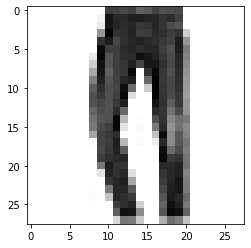

1


In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')



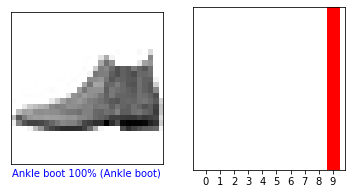

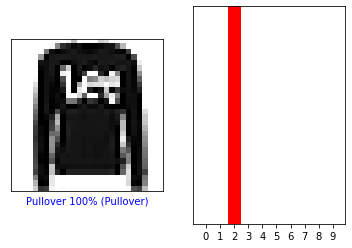

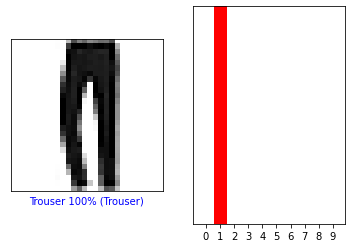

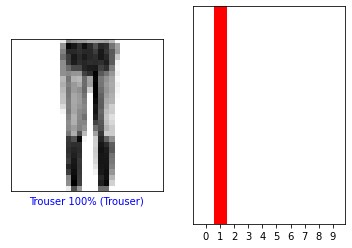

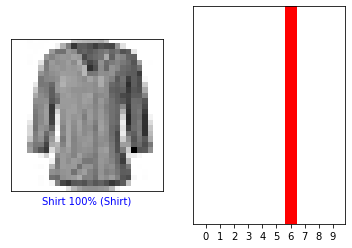

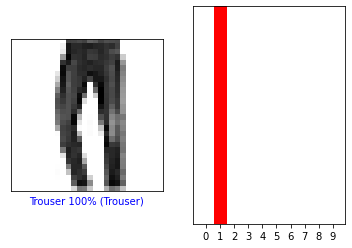

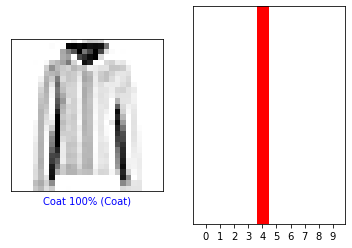

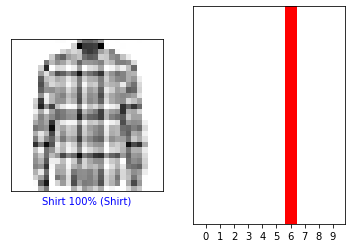

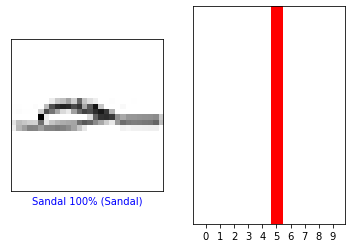

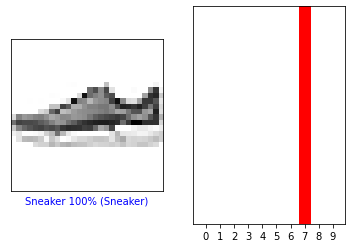

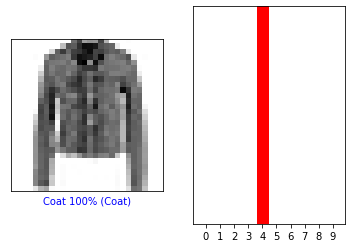

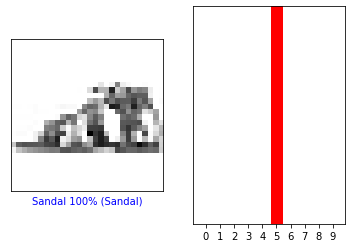

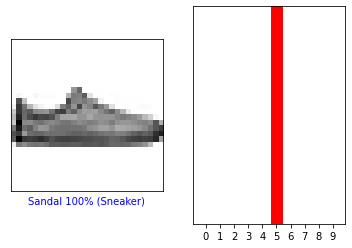

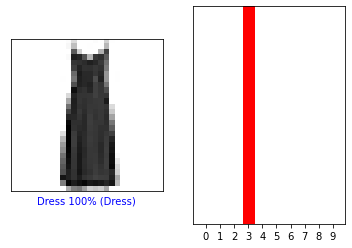

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

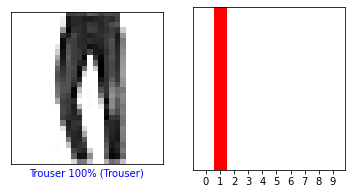

In [ ]:

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 1 con 25 épocas. 


### Crear la red de neuronas

In [ ]:
model1b = models.Sequential()
model1b.add(Conv2D(32, (5, 5), strides=(1,1),padding='same', activation='relu', input_shape=(28, 28, 1)))
model1b.add(MaxPooling2D((2, 2)))

model1b.add(Conv2D(64, (5, 5), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model1b.add(MaxPooling2D((2, 2)))

model1b.add(Flatten())
model1b.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.



In [ ]:
model1b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model1b.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

:Para entrenar la red se realizan ```25``` ciclos. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model1b.fit(train_images, train_labels, 
                    epochs = 25,
                    verbose=1 )

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7533 - accuracy: 0.7312
Epoch 2/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4670 - accuracy: 0.8327
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4130 - accuracy: 0.8530
Epoch 4/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3831 - accuracy: 0.8643
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3588 - accuracy: 0.8740
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3441 - accuracy: 0.8791
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3284 - accuracy: 0.8845
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3157 - accuracy: 0.8878
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3063 - accuracy: 0.8913
Epoch 10/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.296

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model1b.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 61.4174 - accuracy: 0.8504
Test accuracy: 0.8503999710083008


### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

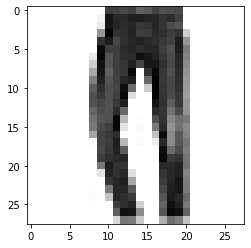

1


In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model1b.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Suma de las predicciones del elemento 6: 1.0


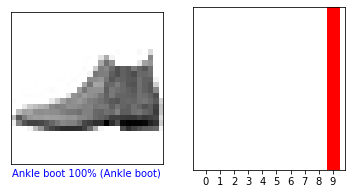

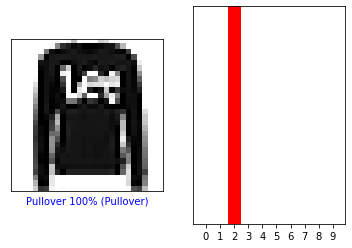

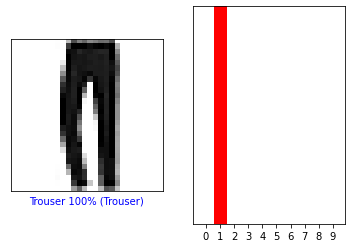

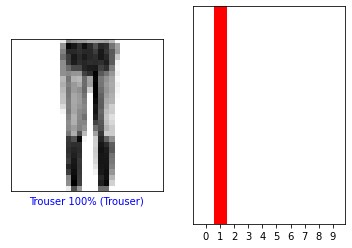

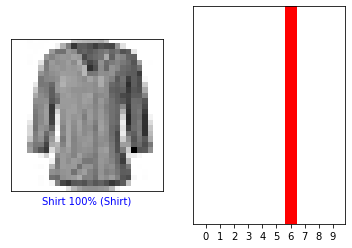

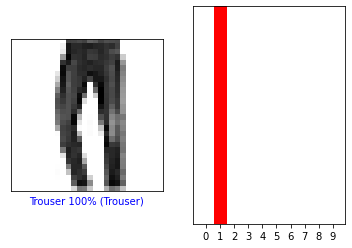

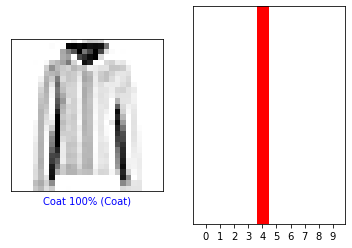

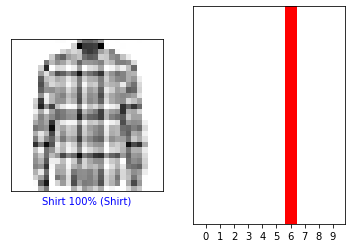

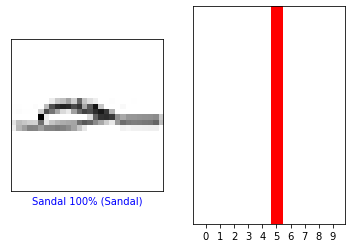

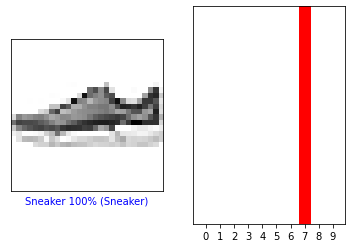

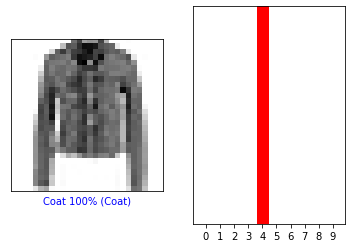

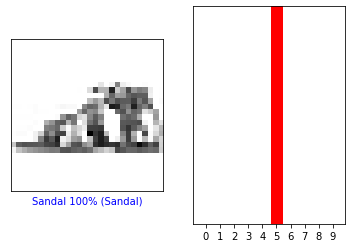

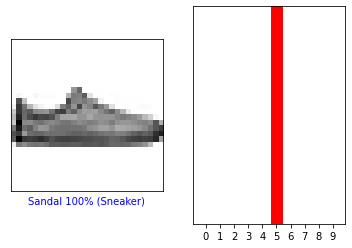

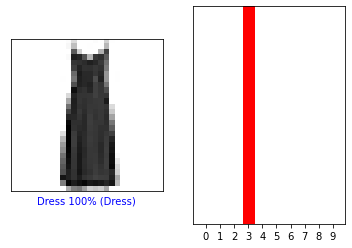

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 1 con función de activación tanh

In [ ]:
model1c = models.Sequential()
model1c.add(Conv2D(64, (7, 7), strides=(1,1),padding='same',  activation='tanh', input_shape=(28, 28, 1)))
model1c.add(MaxPooling2D((2, 2)))

model1c.add(Conv2D(128, (3, 3), strides=(1,1),padding='same',  activation='tanh', input_shape=(28, 28, 1)))
model1c.add(MaxPooling2D((2, 2)))

model1c.add(Flatten())
model1c.add(Dense(65,activation='relu'))
model1c.add(Dense(10,activation='softmax'))


In [ ]:
model1c.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 65)               

In [ ]:
model1b.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model1b.fit(train_images, train_labels, 
                    epochs = 5,
                    verbose=1 )

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2099 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2053 - accuracy: 0.9272
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2019 - accuracy: 0.9277
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1984 - accuracy: 0.9291
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1948 - accuracy: 0.9302


In [ ]:
test_loss, test_acc = model1b.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 57.7350 - accuracy: 0.8508
Test accuracy: 0.8507999777793884


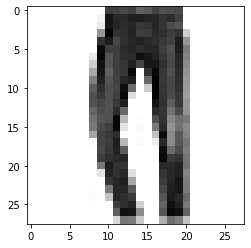

1


In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

In [ ]:
predictions = model1b.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Suma de las predicciones del elemento 6: 1.0


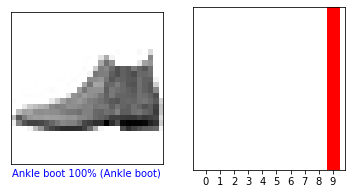

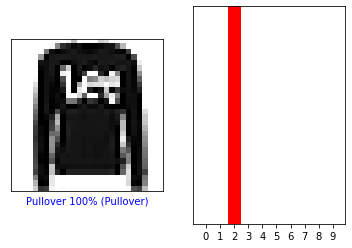

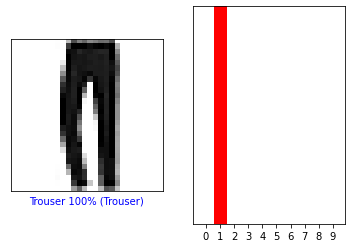

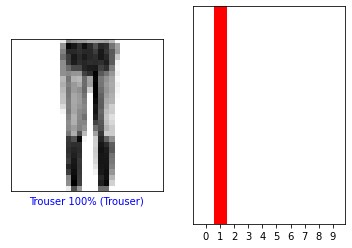

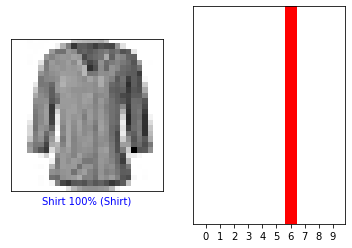

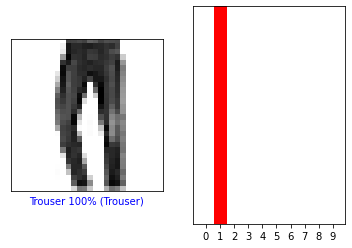

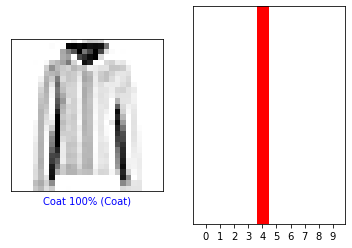

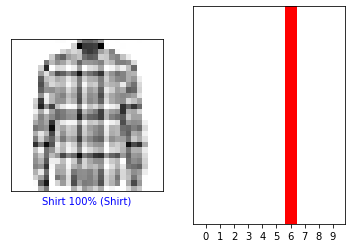

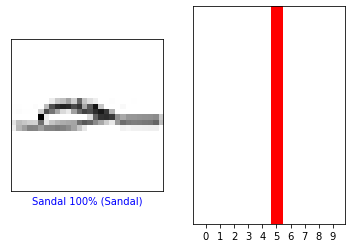

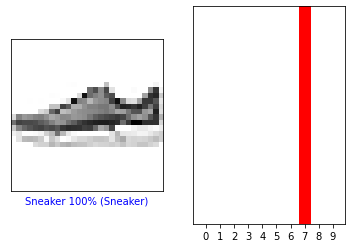

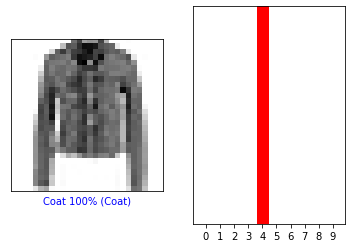

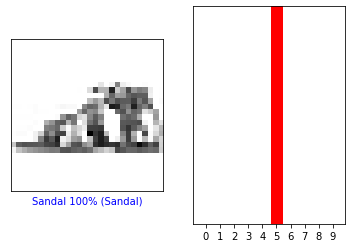

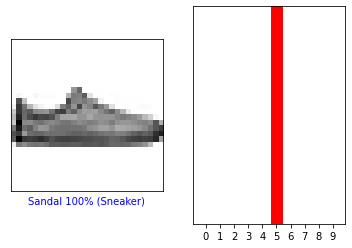

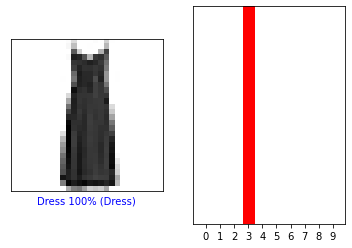

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 2

### Crear la red de neuronas

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 , 28, 1))
train_images = train_images.astype('float32') / 255
test_data = test_images.reshape((10000, 28 , 28, 1))
test_data = test_images.astype('float32') / 255


In [16]:
model2 = models.Sequential()

model2.add(Conv2D(64, (7, 7),  activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))


model2.add(Conv2D(128, (3, 3),  activation='relu', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))


model2.add(Flatten())
model2.add(Dense(65,activation='relu'))
model2.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.

-  ((7*7)+1)*64 = 3200. Se obtiene del tamaño de la capa convolucional, le sumamos 1 por el deesplazamiento y 64 por los filtros
- ((3364)+1)*128=73856 Se obtiene del tamaño de la capa convolucional anterior, le sumamos 1 por el deesplazamiento y 128 por los filtros
- ((141464)+1)*128= 573856. Se obtiene del tamaño de la capa convolucional anterior, le sumamos 1 por el deesplazamiento y 128 por los filtros
- (7*7)+128 = 6272 Capa Flatten                
- 3136*10+10 = 31370 Se obtiene de la capa densa multiplicando por el número de neuronas.
- 6272*65+65=407680  
- 65*10+10=660 Capa softmax
- 3200+73856 + 407745+ 660 = 485,461 Suma total.


In [17]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 65)               

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model2.compile(optimizer = 'sgd',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

In [ ]:
history = model2.fit(train_images, train_labels,
                    epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7856 - accuracy: 0.7136
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5010 - accuracy: 0.8179
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4259 - accuracy: 0.8464
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3847 - accuracy: 0.8623
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3588 - accuracy: 0.8709


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 51.8794 - accuracy: 0.8497
Test accuracy: 51.87942123413086
Test accuracy: 0.8496999740600586


### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

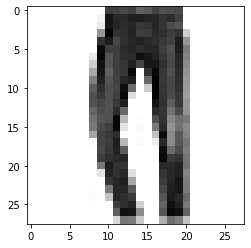

1


In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model2.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 4ms/step
Predicción del elemento 6: clase 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Suma de las predicciones del elemento 6: 1.0


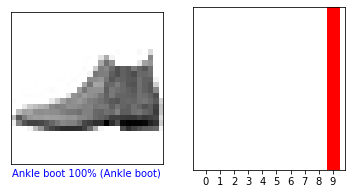

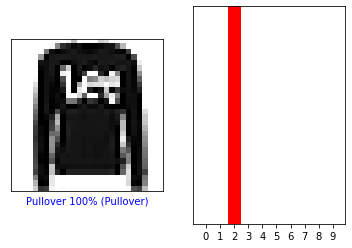

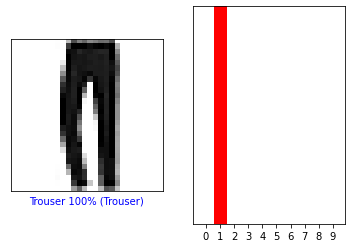

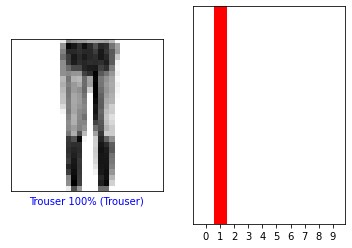

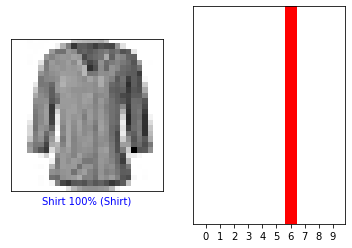

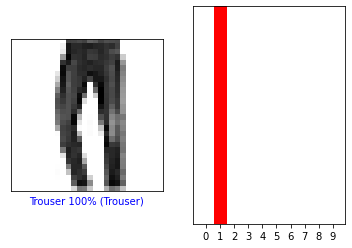

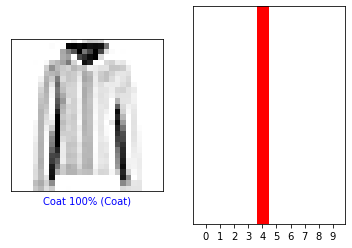

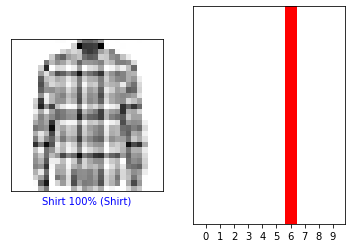

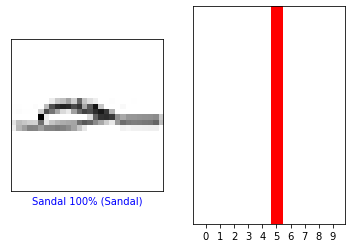

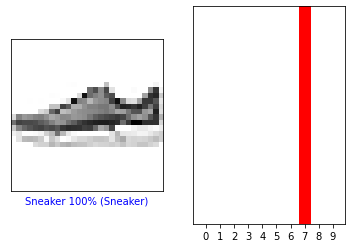

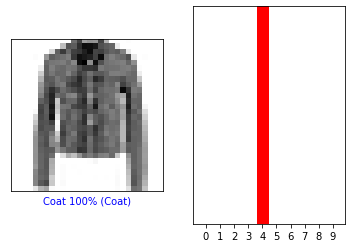

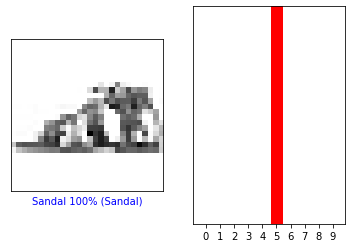

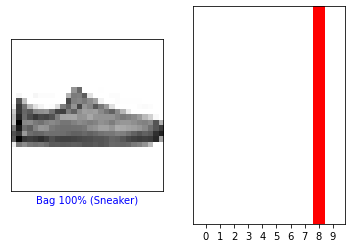

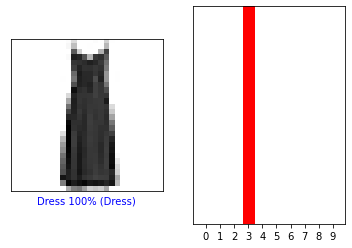

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 2.5 (probamos algunos regularizadores) DropOut y batchNormalization

### Crear la red de neuronas

Hemos probado a añadir los regularidores del ejercicio de clase en nuestro modelo sin obtener grandes cambios

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras import regularizers

def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model2b = models.Sequential()

  if regularizador==0:

      model2b.add(Conv2D(64, (7, 7),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))

  elif regularizador==1:
      model2b.add(Conv2D(64, (7, 7),kernel_regularizer=regularizers.l1(0.001),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l1(0.001), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))
  elif regularizador==2:
      model2b.add(Conv2D(64, (7, 7),kernel_regularizer=regularizers.l2(0.001),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))
  elif regularizador==3:

      model2b.add(Conv2D(64, (7, 7),kernel_regularizer=regularizers.l1_l2(0.001),strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Conv2D(128, (3, 3), strides=(1,1), activation='relu', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model2b.add(Dense(10,activation='softmax'))

  elif regularizador==4:
    
      model2b.add(Conv2D(64, (7, 7),strides=1, activation='relu',padding='same', input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))
      model.add(Dropout(0.25))

      model2b.add(Conv2D(128, (3, 3), strides=1, activation='relu', padding='same',input_shape=(28, 28, 1)))
      model2b.add(MaxPooling2D((2, 2)))
      model2b.add(layers.Dropout(0.25))

      model2b.add(Flatten())
      model2b.add(Dense(65,activation='relu'))
      model.add(BatchNormalization())
      model2b.add(layers.Dropout(0.5))
      model2b.add(Dense(10,activation='softmax'))
      
  else:
      print("ERROR. El valor debe estar entre 0 y 4.")
      model2b.add(layers.Dense(512,activation='softmax',input_shape=(28*28,)))
      model2b.summary()
  return model2b

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


### Explicar model.summary()


In [ ]:
model2b = crea_modelo(4) #Para probar el resto de regularizadores simplemente hay que cambiar el numero entre parentesis

In [ ]:
model2b.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten_4 (Flatten)         (None, 6272)             

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model2b.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model2b.fit(train_images, train_labels,           
                    epochs = 5,
                    verbose=1
                    )

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5731 - accuracy: 0.7960
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3923 - accuracy: 0.8586
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3451 - accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3161 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.8930


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model2b.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 31.2671 - accuracy: 0.8785
Test loss: 31.26713752746582
Test accuracy: 0.8784999847412109


### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

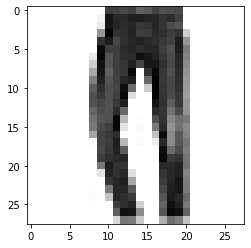

1


In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Suma de las predicciones del elemento 6: 1.0


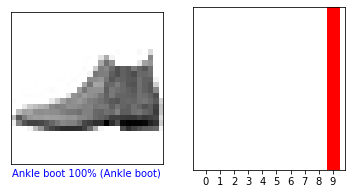

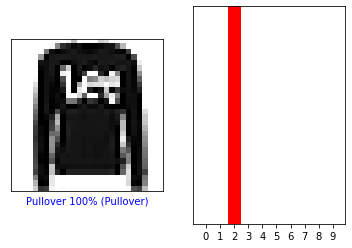

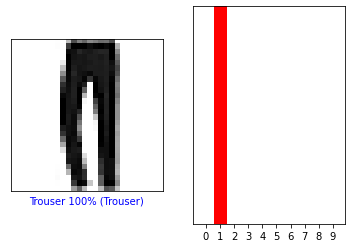

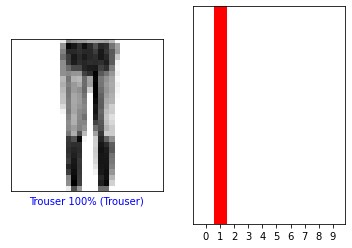

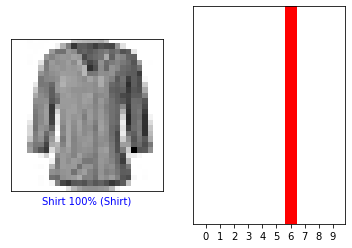

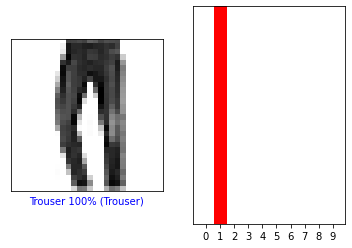

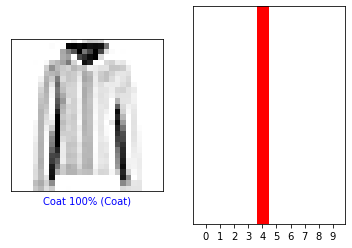

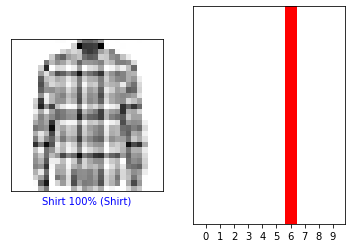

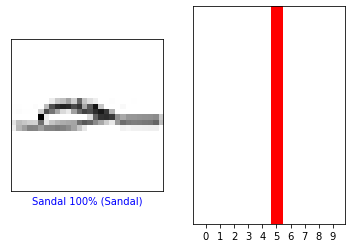

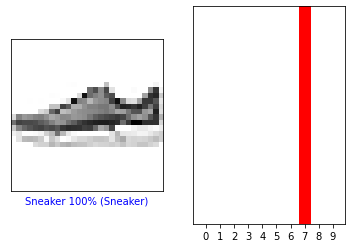

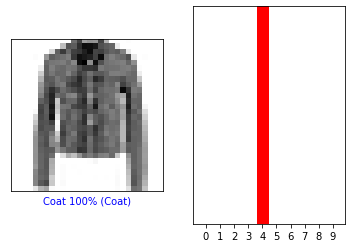

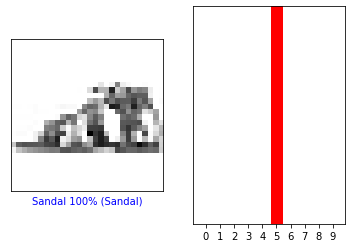

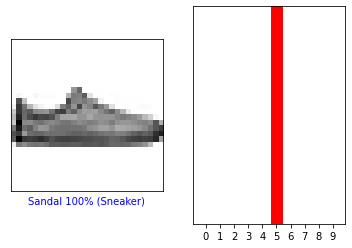

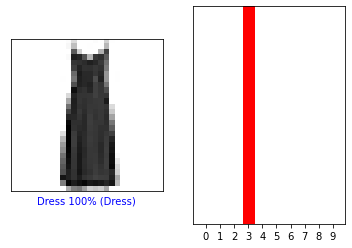

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 3

### Crear la red de neuronas

In [ ]:
model3 = models.Sequential()
model3.add(Conv2D(64, (7, 7), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(65,activation='relu'))
model3.add(Dense(10,activation='softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.

-  ((7*7)+1)*64 = 3200 . Se obtiene del tamaño de la capa convolucional, le sumamos 1 por el deesplazamiento y 64 por los filtros
- ((3*3*64)+1)*128  =  73856 . Se obtiene del tamaño de la capa convolucional anterior, le sumamos 1 por el deesplazamiento y 128 por los filtros
- 7*7*128 = 6272 Capa Flatten
- 6272*65+65 = 407745  
- 65*10+10 = 660 Se obtiene de la capa densa multiplicando por el número de neuronas.
-   3200  +  73856 + 407745 + 660 = 485,461 Suma total.


In [ ]:
model3.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 65)               

Se definen las funciones del optimizador, la pérdida y la métrica.

Probamos que pasaría si cambiamos el optimizador por 'adam' y la funcion de perdida por 'sparse_categorical_crossentropy'. El optimizador adam es una combinacion de AdaGrad y RMSProp ya que además de RMSProp, cada factor de entrenamiento también se ve afectado por el momentum del gradiente. (https://respuestasrapidas.com.mx/que-es-optimizador-adam/) La función de pérdida sparse_categorical_crossentropy, es una medida de distancia entre probabilidades al igual que categorical_crossentropy pero este caso es usado unicamente para numeros enteros.(https://ignaciogavilan.com/catalogo-de-componentes-de-redes-neuronales-iii-funciones-de-perdida/)

In [ ]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar la red

In [ ]:
history = model3.fit(train_images, train_labels,
                   epochs = 25,
                    verbose=1
                     )

Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4167 - accuracy: 0.8506
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2715 - accuracy: 0.9000
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9147
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2026 - accuracy: 0.9249
Epoch 5/25
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1767 - accuracy: 0.9343
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1544 - accuracy: 0.9422
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1344 - accuracy: 0.9488
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1173 - accuracy: 0.9565
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1019 - accuracy: 0.9614
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.087

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 144.7403 - accuracy: 0.8525
test_loss: 144.7402801513672
Test accuracy: 0.8525000214576721


### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

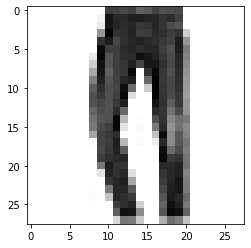

1


In [ ]:
digit = test_images.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model3.predict(test_images)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

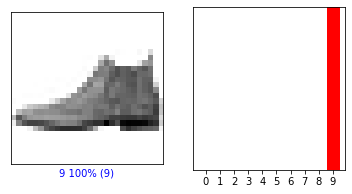

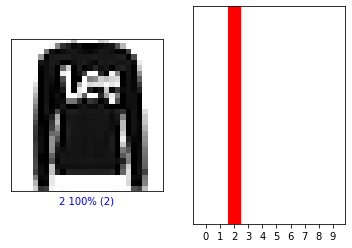

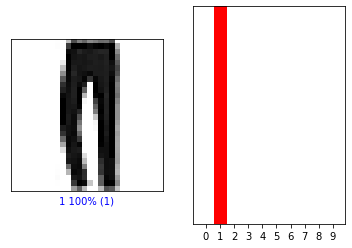

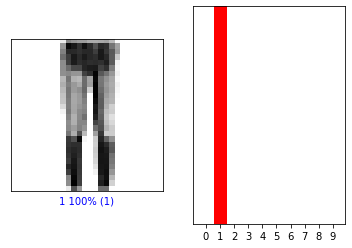

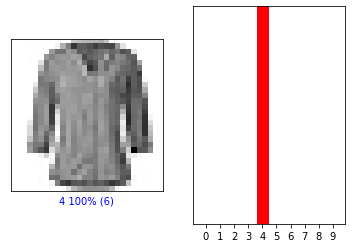

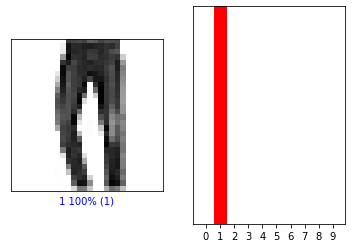

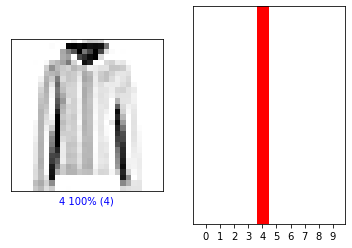

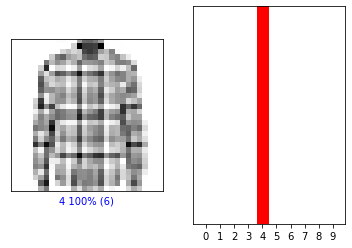

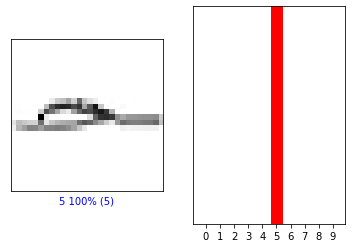

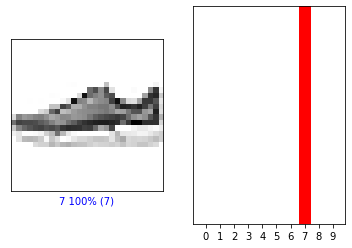

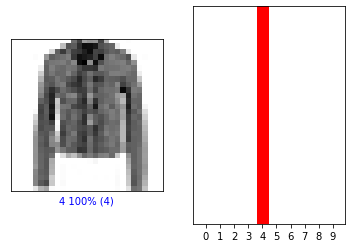

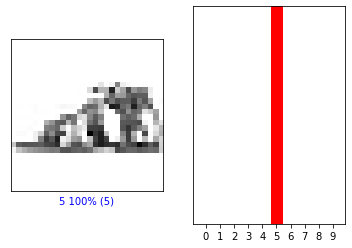

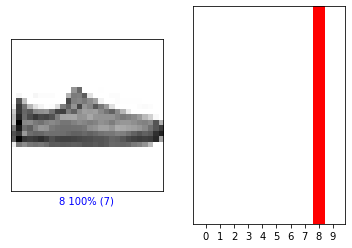

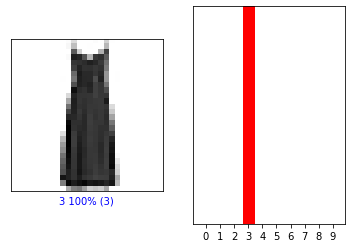

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

## Caso 3 con callbacks

### Crear la red de neuronas

In [ ]:
tf.keras.callbacks.Callback()


In [ ]:
# This function keeps the initial learning rate for the first ten epochs
# and decreases it exponentially after that.
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)


In [ ]:
model3b = models.Sequential()
model3b.add(Conv2D(64, (7, 7), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3b.add(MaxPooling2D((2, 2)))

model3b.add(Conv2D(128, (3, 3), strides=(1,1),padding='same',  activation='relu', input_shape=(28, 28, 1)))
model3b.add(MaxPooling2D((2, 2)))

model3b.add(Flatten())
model3b.add(Dense(65,activation='relu'))
model3b.add(Dense(10,activation='softmax'))

### Explicar model.summary()


In [ ]:
model3b.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_12 (Dense)            (None, 65)               

Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model3b.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model3b.fit(train_images, train_labels,
                    epochs = 25,callbacks=[callback])


Epoch 1/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1499 - accuracy: 0.9441 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1329 - accuracy: 0.9498 - lr: 0.0010
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1146 - accuracy: 0.9560 - lr: 0.0010
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1002 - accuracy: 0.9615 - lr: 0.0010
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0884 - accuracy: 0.9670 - lr: 0.0010
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0772 - accuracy: 0.9712 - lr: 0.0010
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0685 - accuracy: 0.9744 - lr: 0.0010
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9766 - lr: 0.0010
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.05

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model3b.evaluate(test_images, test_labels)
print('test_loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 34.8741 - accuracy: 0.8780
test_loss: 34.8741455078125
Test accuracy: 0.878000020980835


### Predecir valores

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

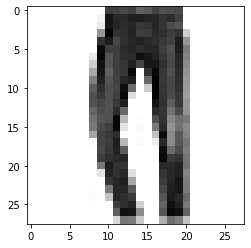

1


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model3b.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

  1/313 [..............................] - ETA: 19s

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7ff5edb2e680>
Traceback (most recent call last):
  File "/usr/lib/python3.7/weakref.py", line 358, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt


313/313 [==============================] - 1s 2ms/step
Predicción del elemento 6: clase 1
[4.6032002e-07 9.9999905e-01 2.3112321e-08 1.5572017e-07 5.2218407e-08
 5.4389815e-10 2.3541786e-07 1.6290113e-11 2.5818153e-08 5.2911509e-11]
Suma de las predicciones del elemento 6: 1.0


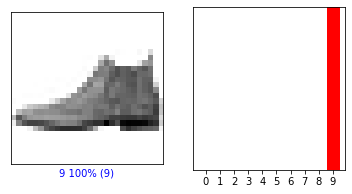

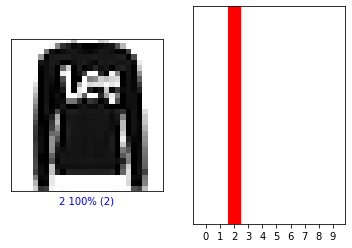

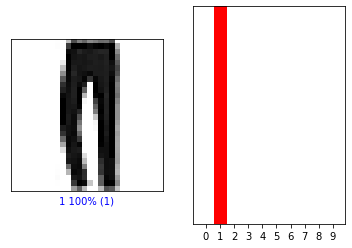

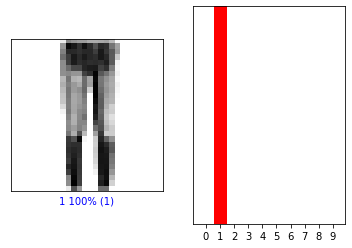

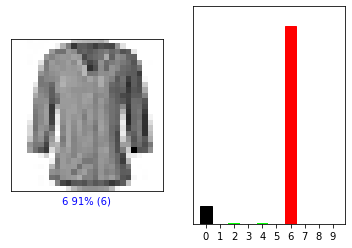

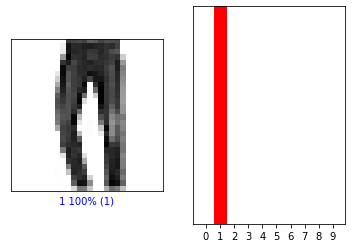

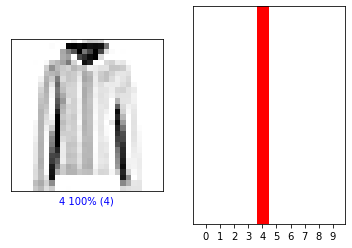

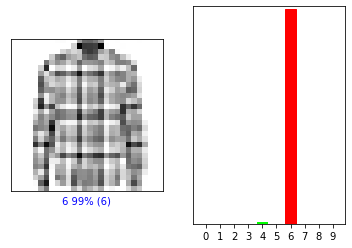

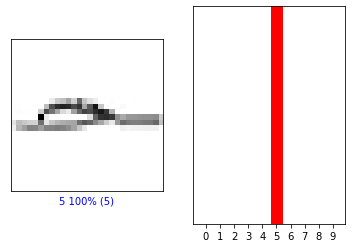

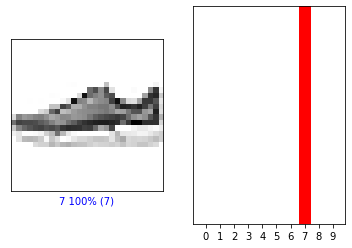

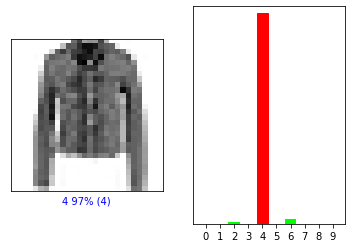

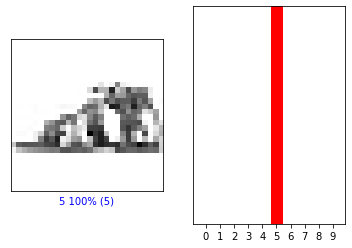

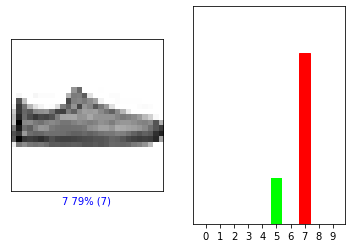

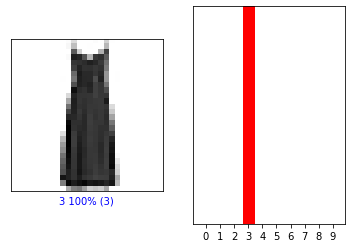

In [ ]:
plt.figure(figsize = (6,3))
for i in range(14):
  plt.subplot(1,2,1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions[i], test_labels)
  plt.show()

La función de callback es una función que se pasa a otra función como un argumento, que luego se invoca dentro de la función externa para completar algún tipo de rutina o acción.
El learning rate es un hiperparametro que indica la rapidez con la que aprende la red y vemos cómo de rápido pueden cambiar los hiperparámetros de un modelo mientras este va aprendiendo

# Conclusiones


- En el caso 1 con 5 épocas nuestro modelo tiene una precisión de 0.8343 y una pérdida de 60.1258. Sin embargo con 25 épocas nuestro modelo tiene una precision de 0.8304 y una pérdida de 66.3230. Con esto concluimos que no hay gran diferencia ya que solo cambia la pérdida. Por tanto será más efectivo con 5 épocas ya que tendrá menor coste computacional.
- En el caso 1 con función de activación relu nuestro modelo tiene una precisión de 0.8343 y una pérdida de 60.1258. Sin embargo con la función de activación tanh nuestro modelo tiene una precision de 0.8456 y una pérdida de 64.2523. Con esto concluimos que no hay gran diferencia pero con relu nos garantizamos el buen funcionamiento de nuestro modelo.
- En el caso 2 con 5 épocas nuestro modelo tiene una precisión de 0.8709 y una pérdida de 0.3588. Sin embargo cuando aplicamos regularizadores como el dropout, nuestro modelo tiene una precision de 0.8930 y una pérdida de 0.2941. Con esto concluimos que no hay una cierta mejoría. Por tanto deberiamos decidir si nos conviene incrementar el coste computacional para obtener esta mejora en la precisión .
- En el caso 3 con 25 épocas nuestro modelo tiene una precisión de 0.9897 y una pérdida de 0.0286. Sin embargo cuando aplicamos callbacks, nuestro modelo tiene una precision de accuracy: 0.9997 y una pérdida de 8.8614e-04. Con esto concluimos que no hay una cierta mejoría. Por lo que podemos observar que ambas son casi perfectas pero al aplicar callbacks obtenemos unas perdidas menores.





De la práctica anterior
En la siguiente tabla observamos los distintos casos con su valor de pérdida y su precisión. 

> 




*   En los casos 1 y 2 ambos tienen capas de 10 neuronas y función de activación 
'relu' , lo que cambia es el optimizador. En el caso 1, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.77 y el del caso 2, el 'rmsprop' con una precisión de 0.83. Por tanto podemos concluir que es más preciso el 'sgd'.
*   En los casos 3 y 4 ambos tienen capas de 10 neuronas y función de activación 'sigmoid' , lo que cambia es el optimizador. En el caso 3, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.64 y el del caso 4, el 'rmsprop' con una precisión de 0.83. Por tanto podemos concluir que es más preciso el optimizador 'sgd'.
*  Comparando la función de activación'relu' y 'sigmoid' de los casos 1, 2, 3 y 4. La función de activación 'relu'(acc 0.77) tiene mayor precisión que 'sigmoid' (acc 0.64)


*   En los casos 5 y 6 ambos tienen capas de 512 neuronas y función de activación 'relu' , lo que cambia es el optimizador. En el caso 5, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.82 y el del caso 6, el 'rmsprop' con una precisión 0.89. Por tanto podemos concluir que es más preciso el optimizador 'rmsprop'.
*   En los casos 7 y 8 ambos tienen capas de 512 neuronas y función de activación 'sigmoid' , lo que cambia es el optimizador. En el caso 7, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.74 y el del caso 8, el 'rmsprop' con una precisión 0.81. Por tanto podemos concluir que es más preciso el optimizador 'rmsprop'.

*   Comparando la función de activación'relu' y 'sigmoid' de los casos 5, 6, 7 y 8. La función de activación 'relu' tiene mayor precisión que 'sigmoid'.

*  En los casos 2.5, 7.5 añadimos 25 épocas lo que nos lleva al sobreentrenamiento de nuestro modelo.

*   Por último, observamos que los modelos con 10 neuronas son menos precisas que los modelos con 512 neuronas.





Comparación de ambas prácticas

> 

- Al comparar ambas prácticas observamos que las redes convolucionales son en general más precisas y entre ellas destaca la función de perdida Adam como la más efectiva. Mientras que en la práctica 1 observamos más diferencia entre unas funciones de pérdida y otras, también observamos que en la práctica 1 al poner 25 epochs se produce sobreentrenamiento mientras que con las redes convolucionales, esto no ocurre ya que lo solucionamos mediante regularizadores como dropout o usando callbacks y además al usarlas obtenemos mayor precisión como se puede ver en el tercer caso.



